# 状态空间模型vs机器学习
分别利用状态空间模型和机器学习模型对同一时间序列进行预测，比较其预测效果。


## 机器学习

In [12]:
# 导入包
import pandas as pd
import numpy as np

# 在notebook内绘图
import matplotlib.pyplot as plt
%matplotlib inline

# 设置图形大小
from matplotlib.pylab import rcParams
rcParams['figure.figsize'] = 20,10

# 标准化数据
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler(feature_range=(0, 1))

# 读取文件
df = pd.read_csv('portfolio.csv')

# 打印头部
df.head()

,Date,AAPL.Close,ABBV.Close,ABT.Close,ACN.Close,ADBE.Close,AIG.Close,ALL.Close,AMGN.Close,AMT.Close,...,UNH.Close,UNP.Close,UPS.Close,USB.Close,V.Close,VZ.Close,WBA.Close,WFC.Close,WMT.Close,XOM.Close
0,1,208.479996,79.260002,79.070000,176.259995,283.660004,47.110001,97.680000,177.059998,192.179993,...,240.500000,177.160004,104.620003,53.340000,162.279999,56.910000,53.919998,48.430000,102.459999,77.129997
1,2,202.860001,77.949997,76.910004,173.940002,277.070007,50.299999,95.660004,173.869995,189.850006,...,238.050003,174.750000,102.089996,52.560001,160.210007,56.630001,52.939999,47.169998,101.300003,76.720001
2,3,202.899994,77.989998,76.220001,173.820007,276.769989,49.959999,95.320000,172.149994,191.639999,...,239.149994,175.580002,101.849998,52.220001,160.759995,56.380001,53.500000,47.000000,100.300003,76.839996
3,4,200.720001,77.910004,76.419998,174.460007,275.790009,50.830002,94.389999,172.869995,192.520004,...,237.970001,175.630005,100.750000,52.119999,159.809998,56.480000,53.560001,46.740002,99.540001,76.769997
4,5,197.179993,77.449997,76.449997,174.300003,278.480011,51.639999,96.379997,171.850006,195.660004,...,240.589996,175.919998,100.629997,52.169998,160.710007,56.910000,53.419998,47.150002,101.910004,76.559998


In [14]:
print(df['Date'][len(df)-1])

301


In [ ]:
# 将索引设置为日期
# df['Date'] = pd.to_datetime(df.Date,format='%Y-%m-%d')
df.index = df['Date']

# 图表
plt.figure(figsize=(16,8))
plt.plot(df['AAPL.Close'], label='Close Price history')

### KNN

D:\DataScience\Anaconda3-2019.3\lib\site-packages\sklearn\preprocessing\data.py:334: DataConversionWarning: Data with input dtype object were all converted to float64 by MinMaxScaler.
  return self.partial_fit(X, y)
D:\DataScience\Anaconda3-2019.3\lib\site-packages\sklearn\preprocessing\data.py:334: DataConversionWarning: Data with input dtype object were all converted to float64 by MinMaxScaler.
  return self.partial_fit(X, y)
D:\DataScience\Anaconda3-2019.3\lib\site-packages\ipykernel_launcher.py:46: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
D:\DataScience\Anaconda3-2019.3\lib\site-packages\ipykernel_launcher.py:47: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value inste

rms = 66.31840606920119


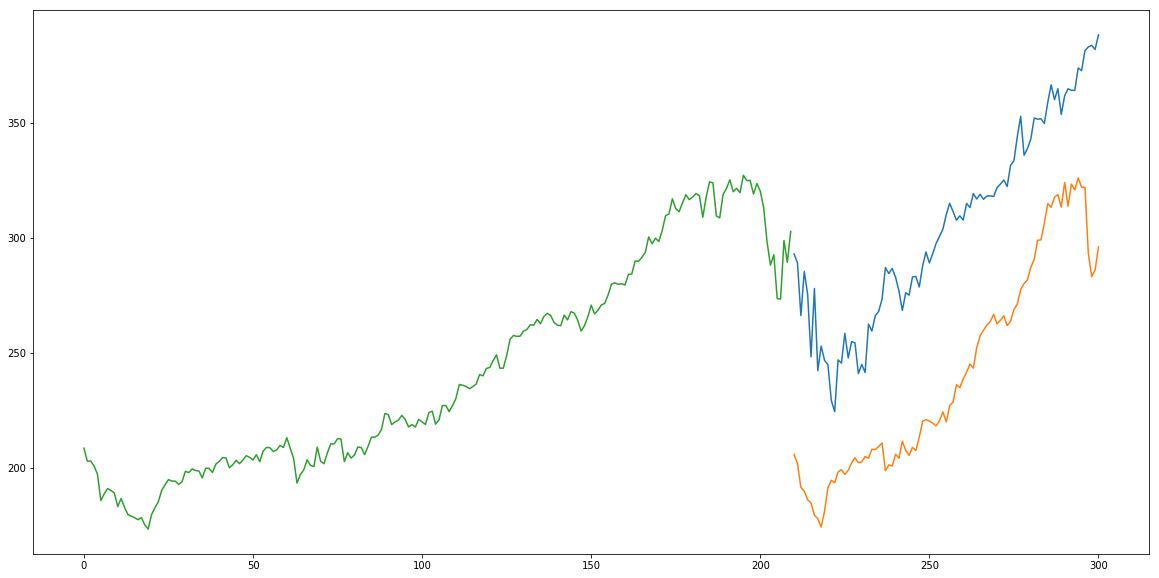

In [15]:
# 导入库
from sklearn import neighbors
from sklearn.model_selection import GridSearchCV
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler(feature_range=(0, 1))

# 使用日期和目标变量创建数据框
# data = df.sort_index(ascending=True, axis=0)
new_data = pd.DataFrame(index=range(0,len(df)),columns=['Date', 'AAPL.Close'])

for i in range(0,len(df)):
    new_data['Date'][i] = df['Date'][i]
    new_data['AAPL.Close'][i] = df['AAPL.Close'][i]
    
# 拆分训练集和验证集
train = new_data[:210]
valid = new_data[210:]

x_train = train.drop('AAPL.Close', axis=1)
y_train = train['AAPL.Close']
x_valid = valid.drop('AAPL.Close', axis=1)
y_valid = valid['AAPL.Close']
 

# 缩放数据
x_train_scaled = scaler.fit_transform(x_train)
x_train = pd.DataFrame(x_train_scaled)
x_valid_scaled = scaler.fit_transform(x_valid)
x_valid = pd.DataFrame(x_valid_scaled)

# 使用gridsearch查找最佳参数
params = {'n_neighbors':[2,3,4,5,6,7,8,9]}
knn = neighbors.KNeighborsRegressor()
model = GridSearchCV(knn, params, cv=5)

# 拟合模型并进行预测
model.fit(x_train,y_train)
preds = model.predict(x_valid)

In [ ]:
# rmse
rms = np.sqrt(np.mean(np.power((np.array(y_valid)-np.array(preds)),2)))
print('rms =',rms)

In [ ]:
# 图表
valid['Predictions'] = 0
valid['Predictions'] = preds
plt.plot(valid[['AAPL.Close', 'Predictions']])
plt.plot(train['AAPL.Close'])

### 